In [9]:
from allthethings import PyNetwork
from allthethings import PyBC_opt_dh
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [10]:
fi = "indata/3pipes3.inp"     #location of .inp file
fc = "indata/3pipes3.config"  #location of .config file
#fi = "indata/3pipesL1.5.inp"     #location of .inp file
#fc = "indata/3pipes1L1.5.config"  #location of .config file
mtype = 1                         #model used along network edges. 1 for Preissman Slot. 0 for uniform
n1 = PyNetwork(fi, fc, mtype)      #a network object
print n1 
print n1.a

Network at address 0x1023b7a30 with 4 nodes and 3 edges

[120.0, 120.0, 120.0]


In [11]:
#n1.showCurrentData()    
dt = n1.T/n1.M
V0 = n1.getTotalVolume()
n1.runForwardProblem(dt)  #solve up to time T
print "Elapsed time is %.5f s, solve time is %.5f s" %(n1.T,n1.solve_time)
print "Initial Volume is %f"%V0
print "Final Volume is   %f" %n1.getTotalVolume()

Elapsed time is 5.00000 s, solve time is 1.85217 s
Initial Volume is 209.167160
Final Volume is   209.654360


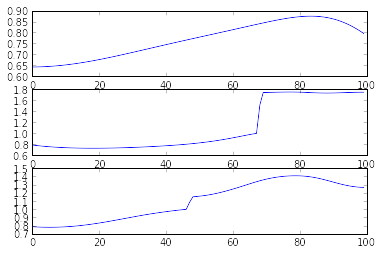

0.228713204761
[121.29450518847376, 121.19102529384166, 120.38338067573265]
cmax*dt/dx = 0.866429 
1.74827259244


In [12]:
qi = [n1.q(i) for i in range(n1.Nedges)]
hi = [n1.getHofA(i) for i in range(3)]
Ai = [qi[i][0:n1.Ns[i]] for i in range(3)]
Qi = [qi[i][n1.Ns[i]:] for i in range(3)] 
u= []
for i in range(3):
        u.append([Qi[i][k]/Ai[i][k] for k in range(n1.Ns[i])])
fig,ax = plt.subplots(nrows = n1.Nedges)
for k in range(n1.Nedges):
    x = np.arange(0,n1.Ls[k], n1.Ls[k]/n1.Ns[k])
    ax[k].plot(x,hi[k][0:n1.Ns[k]],'b')
plt.show()
print n1.getAveGradH(600)
umax = max(abs(max(ui)) for ui in u)
print n1.cmax
print "cmax*dt/dx = %f "%((max(n1.a)+umax)*dt/n1.Ls[0]*n1.Ns[0])
print hi[1][99]

In [13]:
ndof = 8
wn = np.array([1,2])
x0 = 0*np.ones(ndof*len(wn))
for i in range(ndof*len(wn)/2):
    x0[2*i+1] = 0
opt1 = PyBC_opt_dh(fi, fc, ndof, x0, 0, wn)
opt1.compute_f()
f0 = opt1.f
print "f is %f" %opt1.f
print "T is %f" %opt1.T
print "Using %s modes" %opt1.modetype

f is 0.035351
T is 5.000000
Using Hermite modes


In [ ]:
opt1.solve()
#opt1.x
#opt1.r


In [ ]:
#opt1.x

In [ ]:
#import matplotlib.pyplot as plt
ff = opt1.f
Q1 = opt1.getBCtimeseries(0)
Q2 = opt1.getBCtimeseries(1)
print "Final f/Initial f  = %.15f"%(ff/f0)
t = np.linspace(0,opt1.T, opt1.M+1)
plot(t,Q1,t,np.zeros(opt1.M+1),'r')
xlabel('t')
ylabel('Q1(t)')



In [ ]:
plot(t,Q2,t,np.zeros(opt1.M+1),'r')
xlabel('t')
ylabel('Q2(t)')
n1.Ns
n1.a

print opt1.x